<a href="https://colab.research.google.com/github/chokpik/cd_202202_Camilo_Duran/blob/master/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [52]:
#Datos
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df['sexo_'] = df['sexo_'].astype('string')

In [54]:
df2 = df.select_dtypes(exclude=['datetime64'])
rm = ['ID', 'fec_not', 'año', 'uni_med_', 'cod_pais_o', 'cod_dpto_o', 
         'cod_mun_o', 'ocupacion_', 'tip_ss_', 'cod_ase_', 'gp_discapa', 
         'gp_migrant','gp_carcela', 'gp_gestan', 'gp_calle', 'gp_psiquia',
         'gp_vic_vio', 'fecha_contagio', 'inicio_sintomas', 'condicion_final', 'fecha_nacimiento', 'fecha_defuncion', 
         'certif_defuncion', 'fec_hos_', 'conducta']
datos = df2.drop(rm, axis=1)
datos.dtypes

semana                 int64
edad_                  int64
sexo_                 string
area_                  int64
gp_desplaz             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud             float64
dtype: object

In [58]:
datos['sexo_'] = datos['sexo_'].replace(['M'], '0')
datos['sexo_'] = datos['sexo_'].replace(['F'], '1')
datos['sexo_'] = datos['sexo_'].astype('int64')
datos.dtypes

semana                 int64
edad_                  int64
sexo_                  int64
area_                  int64
gp_desplaz             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud             float64
dtype: object

In [ ]:
lista_datos = datos.to_numpy().tolist()
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(lista_datos)
datos_normalizados[:5]

In [79]:
kmeans = KMeans(
  init="random",
  n_clusters=12,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [80]:
kmeans.fit(datos_normalizados)

KMeans(init='random', n_clusters=12, random_state=42)

In [87]:
datos['Kmeans_labels_'] = kmeans.labels_
datos

,semana,edad_,sexo_,area_,gp_desplaz,pac_hos_,familiar_sintomas,fiebre,cefalea,dolor_retroocular,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,Kmeans_labels_
0,1,25,1,1,2,2,2,1,2,1,...,2,2,2,2,2,2,2,7.076011,-73.102501,12
1,1,24,0,1,2,2,2,1,1,2,...,2,2,2,2,2,2,2,7.079495,-73.105400,5
2,1,58,0,1,2,2,1,1,1,1,...,2,2,2,2,2,2,2,7.090290,-73.091003,8
3,1,29,1,1,2,2,1,1,1,2,...,2,2,2,2,2,2,2,7.067435,-73.090958,8
4,1,56,1,1,2,1,1,1,1,2,...,2,2,2,2,1,2,2,7.066905,-73.104980,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36,1,1,2,2,2,1,1,1,...,2,2,1,2,2,2,2,7.072610,-73.099487,4
1258,9,42,0,1,2,1,2,1,1,2,...,2,2,2,2,1,2,1,7.065252,-73.103607,7
1259,9,2,0,1,2,2,1,1,1,1,...,2,2,2,2,2,2,2,7.091391,-73.103264,8
1260,9,12,1,1,2,2,2,1,1,2,...,2,2,2,2,2,2,2,7.061083,-73.097000,5


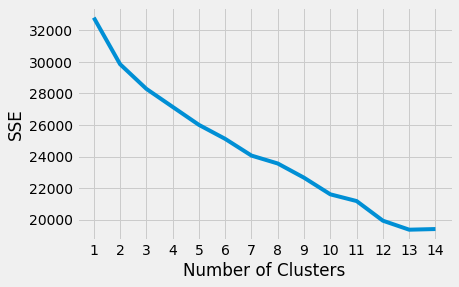

In [81]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(datos_normalizados)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [78]:
kl = KneeLocator(
  range(1, 15), sse, curve="convex", direction="decreasing"
)
kl.elbow

12

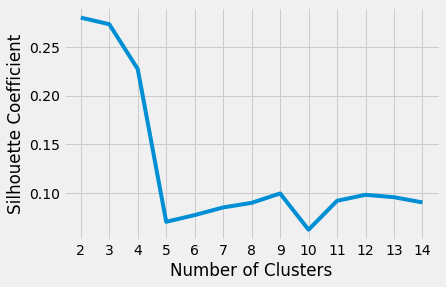

In [84]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(datos_normalizados)
  score = silhouette_score(datos_normalizados, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()